In [1]:
%matplotlib inline

import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import scipy.stats as stats
import halotools.mock_observables as mo
import halotools.sim_manager as sm

In [2]:
fname='./l0125_d30b.catalog'
mthresh=3e11
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = (temp['halo_rvir']/temp['halo_rs'])
data1 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))


fname='./l0125_d20b.catalog'
mthresh=4e11
reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = (temp['halo_rvir']/temp['halo_rs'])
data2 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))

fname='./l0125_d10b.catalog'
mthresh=4e11
reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_eq_dict={'halo_pid':-1})
temp = reader.read_ascii()
cnfw_temp = (temp['halo_rvir']/temp['halo_rs'])
data3 =  append_fields(temp, ('halo_cNFW'), (cnfw_temp))


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d30b.catalog
 
Total number of rows in detected data = 2127860
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 16.36 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d20b.catalog
 
Total number of rows in detected data = 2119379
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 16.83 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0125_d10b.catalog
 
Total number of rows in detected data = 2095780
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 16.71 seconds




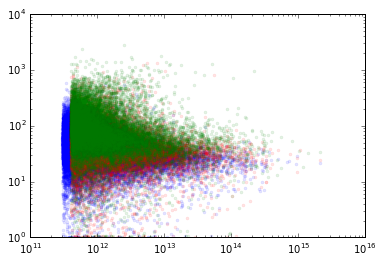

In [3]:
plt.loglog(data1['halo_mass'], data1['halo_cNFW'], 'b.', alpha=0.1)
plt.loglog(data2['halo_mass'], data2['halo_cNFW'], 'r.', alpha=0.1)
plt.loglog(data3['halo_mass'], data3['halo_cNFW'], 'g.', alpha=0.1)

/opt/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


<Container object of 3 artists>

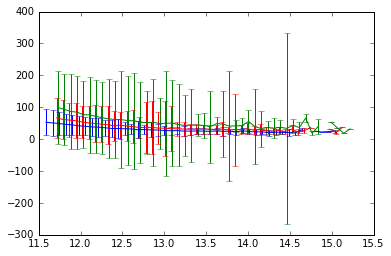

In [4]:
total_bins = 50

X1 = np.log10(data1['halo_mass'])
Y1 = data1['halo_cNFW']
X2 = np.log10(data2['halo_mass'])
Y2 = data2['halo_cNFW']
X3 = np.log10(data3['halo_mass'])
Y3 = data3['halo_cNFW']

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_median = [np.median(Y1[idx==k]) for k in range(total_bins)]
running_std = [np.std(Y1[idx==k]) for k in range(total_bins)]

plt.errorbar(bins+delta/2.5, running_median, yerr=running_std, color='b')

bins = np.linspace(X2.min(),X2.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X2,bins)
running_median = [np.median(Y2[idx==k]) for k in range(total_bins)]
running_std = [np.std(Y2[idx==k]) for k in range(total_bins)]

plt.errorbar(bins+delta/2., running_median, yerr=running_std, color='r')

bins = np.linspace(X3.min(),X3.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X3,bins)
running_median = [np.median(Y3[idx==k]) for k in range(total_bins)]
running_std = [np.std(Y3[idx==k]) for k in range(total_bins)]

plt.errorbar(bins+delta/1.5, running_median, yerr=running_std, color='g')

In [5]:
ms_data1 = np.sort(data1, order='halo_mass')
cnfw_data1bin = stats.binned_statistic(np.log10(ms_data1['halo_mass']),
                                       (ms_data1['halo_cNFW']),
                                       statistic='mean', bins=20)
cnfw_data1fix = (ms_data1['halo_cNFW']) / cnfw_data1bin.statistic[cnfw_data1bin.binnumber-1]


ms_data2 = np.sort(data2, order='halo_mass')
cnfw_data2bin = stats.binned_statistic(np.log10(ms_data2['halo_mass']),
                                       (ms_data2['halo_cNFW']),
                                       statistic='mean', bins=20)
cnfw_data2fix = (ms_data2['halo_cNFW']) / cnfw_data2bin.statistic[cnfw_data2bin.binnumber-1]

ms_data3 = np.sort(data3, order='halo_mass')
cnfw_data3bin = stats.binned_statistic(np.log10(ms_data3['halo_mass']),
                                       (ms_data3['halo_cNFW']),
                                       statistic='mean', bins=20)
cnfw_data3fix = (ms_data3['halo_cNFW']) / cnfw_data3bin.statistic[cnfw_data3bin.binnumber-1]

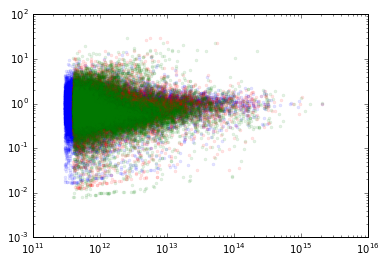

In [6]:
plt.loglog(ms_data1['halo_mass'], cnfw_data1fix, 'b.', alpha=0.1)
plt.loglog(ms_data2['halo_mass'], cnfw_data2fix, 'r.', alpha=0.1)
plt.loglog(ms_data3['halo_mass'], cnfw_data3fix, 'g.', alpha=0.1)

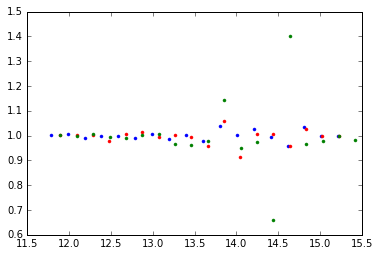

In [7]:
total_bins = 20

X1 = np.log10(ms_data1['halo_mass'])
Y1 = cnfw_data1fix
X2 = np.log10(ms_data2['halo_mass'])
Y2 = cnfw_data2fix
X3 = np.log10(ms_data3['halo_mass'])
Y3 = cnfw_data3fix

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_mean = [np.mean(Y1[idx==k]) for k in range(total_bins)]

plt.plot(bins+delta/2, running_mean, 'b.')

bins = np.linspace(X2.min(),X2.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X2,bins)
running_mean = [np.mean(Y2[idx==k]) for k in range(total_bins)]

plt.plot(bins+delta/2, running_mean, 'r.')

bins = np.linspace(X3.min(),X3.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X3,bins)
running_mean = [np.mean(Y3[idx==k]) for k in range(total_bins)]

plt.plot(bins+delta/2, running_mean, 'g.')

In [8]:
print np.max(data1['halo_x'])
print np.max(data2['halo_x'])
print np.max(data3['halo_x'])

124.98423
124.98374
124.98362
